# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons

Let's generate our dataset and take a look on it.

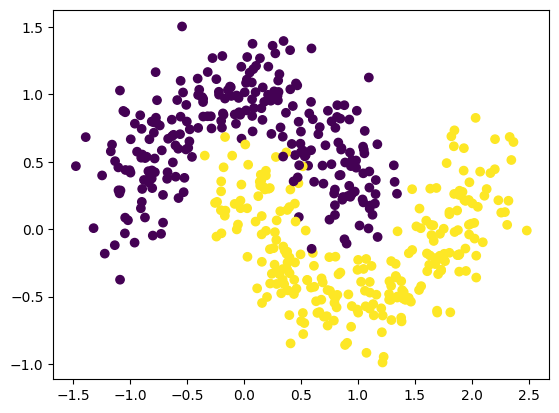

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [21]:
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


lr = LogisticRegression(C=1, solver="saga", max_iter=500, tol=1e-3)  # inspired by part 2
svm = SVC(kernel="linear", tol=1e-3, max_iter=500, C=1)  # inspired by part 2

# I prefer to prepare some test, feeling uncomfortable without it (especially further, when I would choose a degree of the polynomial)
test_moons, test_labels = make_moons(n_samples=250, noise=0.2, random_state=41)

### YOUR CODE HERE
lr.fit(moons_points, moons_labels)
predicted_labels_lr = lr.predict(test_moons)
lr_accuracy = accuracy_score(test_labels, predicted_labels_lr)
print("Accuracy of Logistic Regression ", lr_accuracy)

svm.fit(moons_points, moons_labels)
predicted_labels_svm = svm.predict(test_moons)
svm_accuracy = accuracy_score(test_labels, predicted_labels_svm)
print("Accuracy of SVM ", svm_accuracy)

Accuracy of Logistic Regression  0.868
Accuracy of SVM  0.868


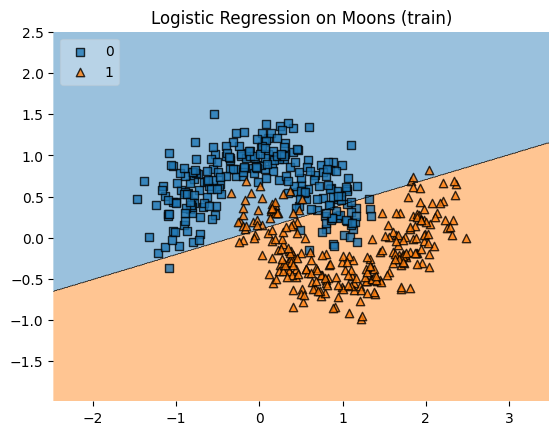

In [22]:
# Plotting decision regions for LR
plot_decision_regions(moons_points, moons_labels, clf=lr, legend=2)

# Adding axes annotations
plt.title('Logistic Regression on Moons (train)')

plt.show()

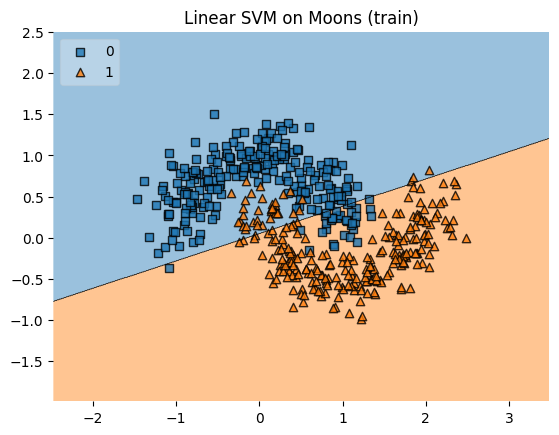

In [23]:
# Plotting decision regions for LR
plot_decision_regions(moons_points, moons_labels, clf=svm, legend=2)

# Adding axes annotations
plt.title('Linear SVM on Moons (train)')

plt.show()

##### Точность, численно, хорошая, но только если не смотреть на картинку :) Оба линейных метода провели прямую примерно одинаково. Разумеется, очень хочется провести какую-нибудь нелинейную поверхность между классами.

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

#### Начнём с самого простого: полином, coef0=0

In [44]:
from tqdm import tqdm

 29%|██▊       | 4/14 [00:48<02:05, 12.54s/it]C:\Users\serge\Desktop\ML_course\.venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
 36%|███▌      | 5/14 [00:58<01:44, 11.63s/it]C:\Users\serge\Desktop\ML_course\.venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
 43%|████▎     | 6/14 [01:12<01:39, 12.41s/it]C:\Users\serge\Desktop\ML_course\.venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
 50%|█████     | 7/14 [01:24<01:25, 12.22s/it]C:\Users\serge\Desktop\ML_course\.venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated

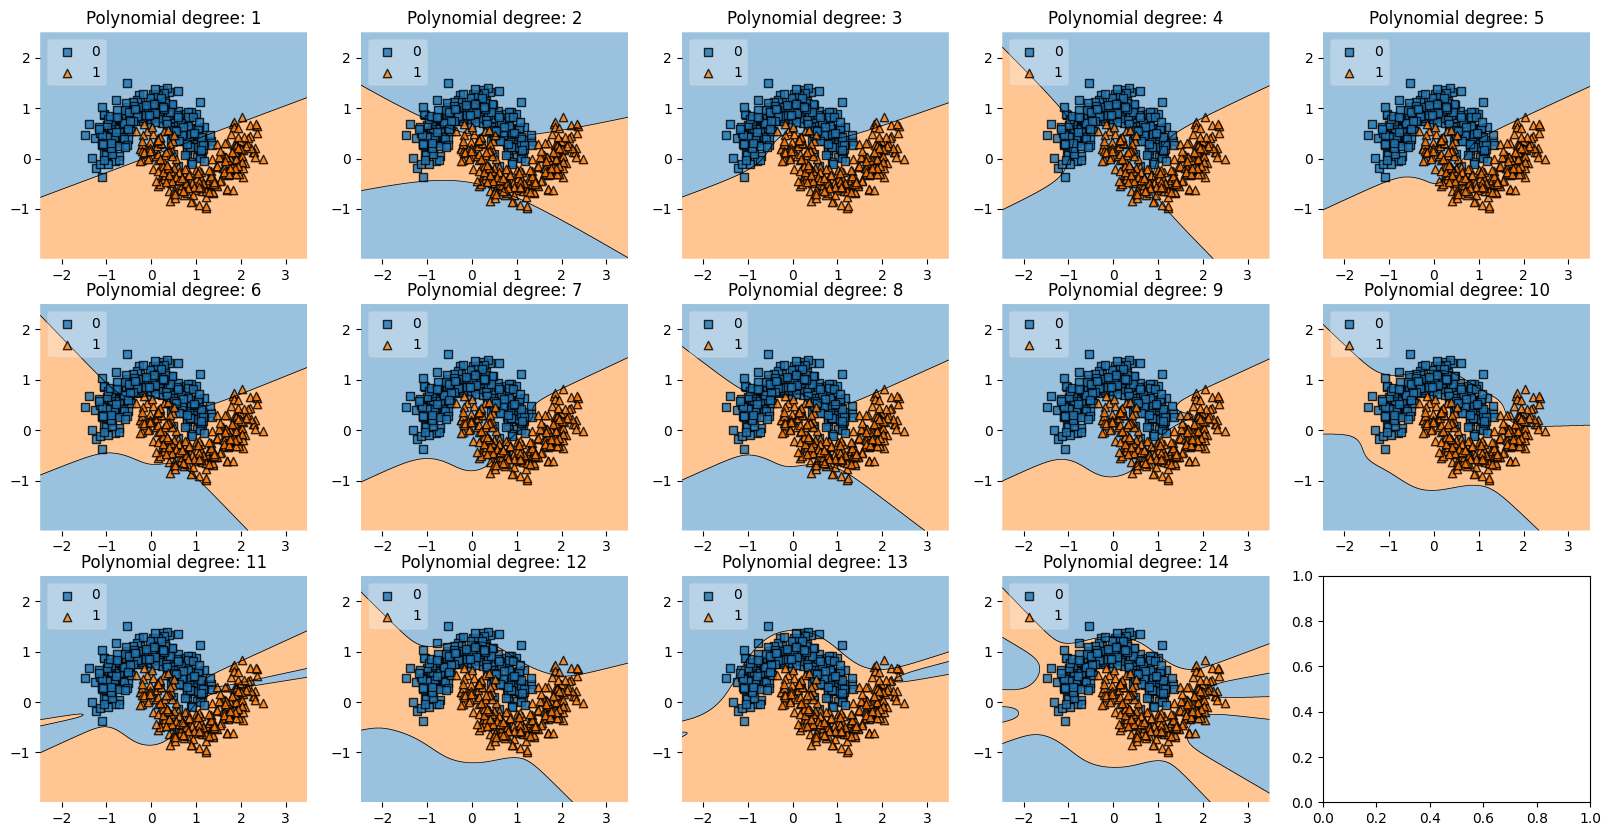

In [49]:
### YOUR CODE HERE
degrees = range(1, 15)
accuracies = []
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))
axes = axes.flatten()
for i in tqdm(range(len(degrees))):
    svm = SVC(kernel="poly", tol=1e-3, max_iter=500, degree=degrees[i], C=1, coef0=0)
    svm.fit(moons_points, moons_labels)
    predicted_labels_svm = svm.predict(test_moons)
    svm_accuracy = accuracy_score(test_labels, predicted_labels_svm)
    plot_decision_regions(moons_points, moons_labels, clf=svm, legend=2, ax=axes[i])
    axes[i].set_title(f"Polynomial degree: {degrees[i]}")
    accuracies.append(svm_accuracy)
plt.show()

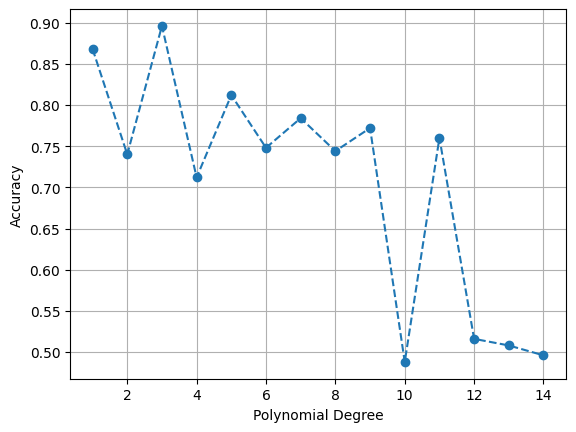

In [50]:
plt.plot(degrees, accuracies, marker='o', linestyle='--')
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

##### Тут отчётливо видно, что нечётные полиномы лучше, чем чётные. Ближе всего данные аппроксимируются полиномом третьей степени. Хотя качество в целом оставляет желать лучшего (тут даже переобучения не происходит), наверное, потому, что вид полинома в окрестности нуля при нулевом сдвиге плохо подходит для наших данных. А ещё -- количество итераций может быть недостаточным (на что и ругается sklearn)

#### Дадим полиномам ещё шанс! Пусть coef0 = 1, 2

  7%|▋         | 1/14 [00:09<01:58,  9.10s/it]C:\Users\serge\Desktop\ML_course\.venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
 29%|██▊       | 4/14 [00:26<01:00,  6.10s/it]C:\Users\serge\Desktop\ML_course\.venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
 36%|███▌      | 5/14 [00:30<00:47,  5.32s/it]C:\Users\serge\Desktop\ML_course\.venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
 43%|████▎     | 6/14 [00:35<00:41,  5.20s/it]C:\Users\serge\Desktop\ML_course\.venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated

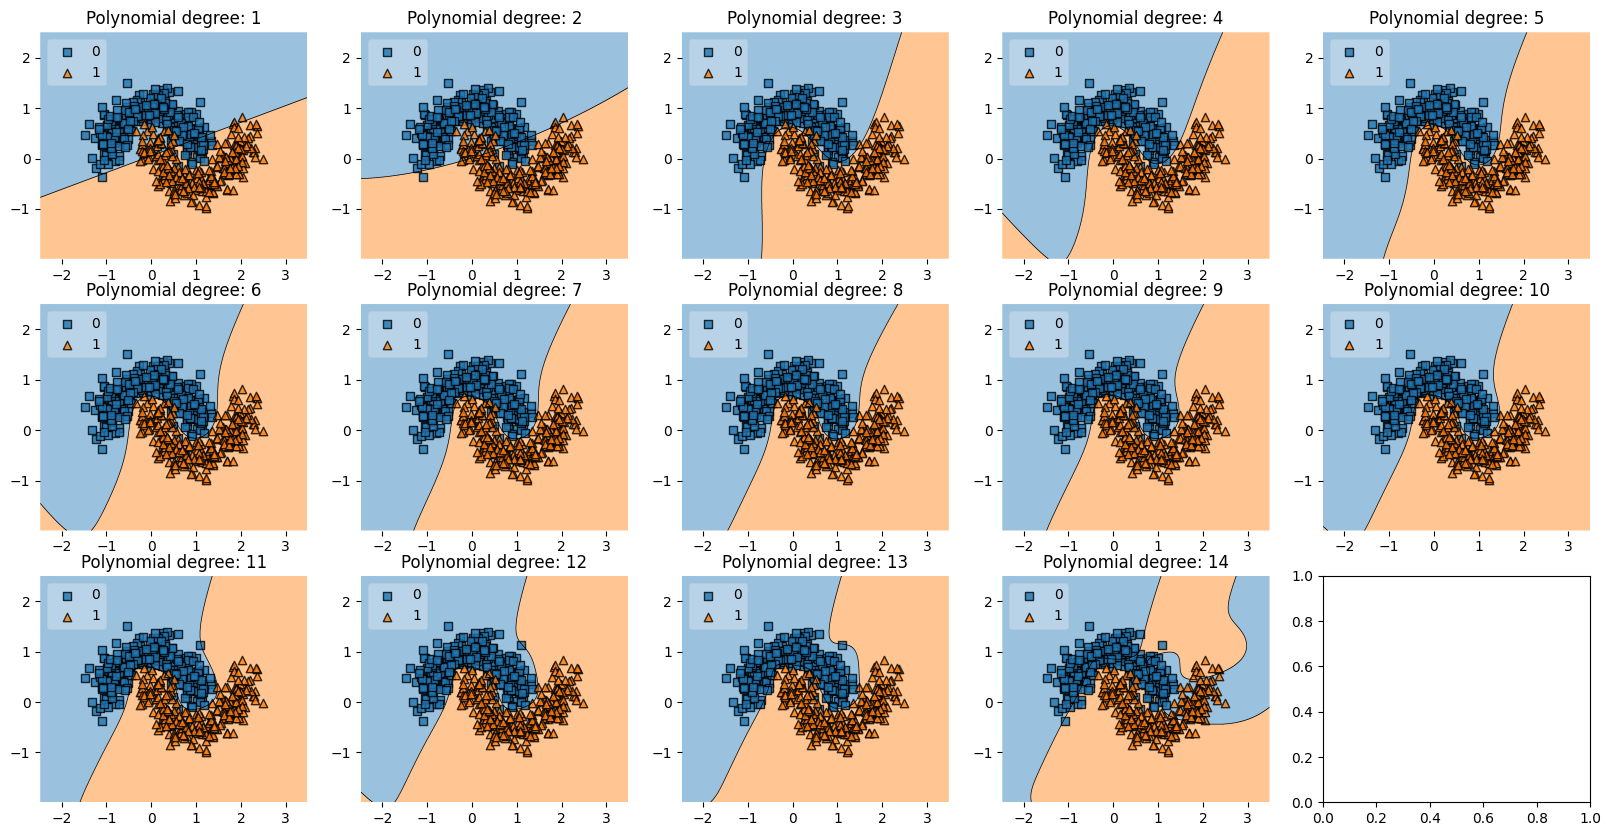

In [51]:
degrees = range(1, 15)
accuracies = []
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))
axes = axes.flatten()
for i in tqdm(range(len(degrees))):
    svm = SVC(kernel="poly", tol=1e-3, max_iter=500, degree=degrees[i], C=1, coef0=1)
    svm.fit(moons_points, moons_labels)
    predicted_labels_svm = svm.predict(test_moons)
    svm_accuracy = accuracy_score(test_labels, predicted_labels_svm)
    plot_decision_regions(moons_points, moons_labels, clf=svm, legend=2, ax=axes[i])
    axes[i].set_title(f"Polynomial degree: {degrees[i]}")
    accuracies.append(svm_accuracy)
plt.show()

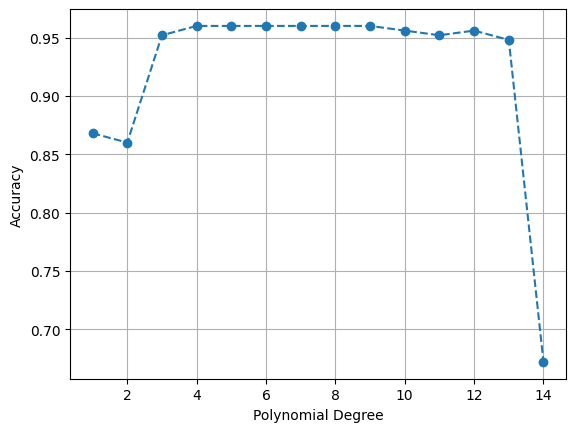

In [52]:
plt.plot(degrees, accuracies, marker='o', linestyle='--')
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

##### Если полиномы сдвинуть, то результат гораздо лучше. Тут хотя бы accuracy выходит на некоторое плато, а потом уже перестаёт хватать числа итераций. Судя по графикам, здесь нет переобучения при таком количестве итераций, скорее просто все коэффициенты не успевают обучиться.

  7%|▋         | 1/14 [00:12<02:41, 12.43s/it]C:\Users\serge\Desktop\ML_course\.venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
 14%|█▍        | 2/14 [00:23<02:22, 11.85s/it]C:\Users\serge\Desktop\ML_course\.venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
 29%|██▊       | 4/14 [00:33<01:09,  6.97s/it]C:\Users\serge\Desktop\ML_course\.venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
 36%|███▌      | 5/14 [00:37<00:53,  5.94s/it]C:\Users\serge\Desktop\ML_course\.venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated

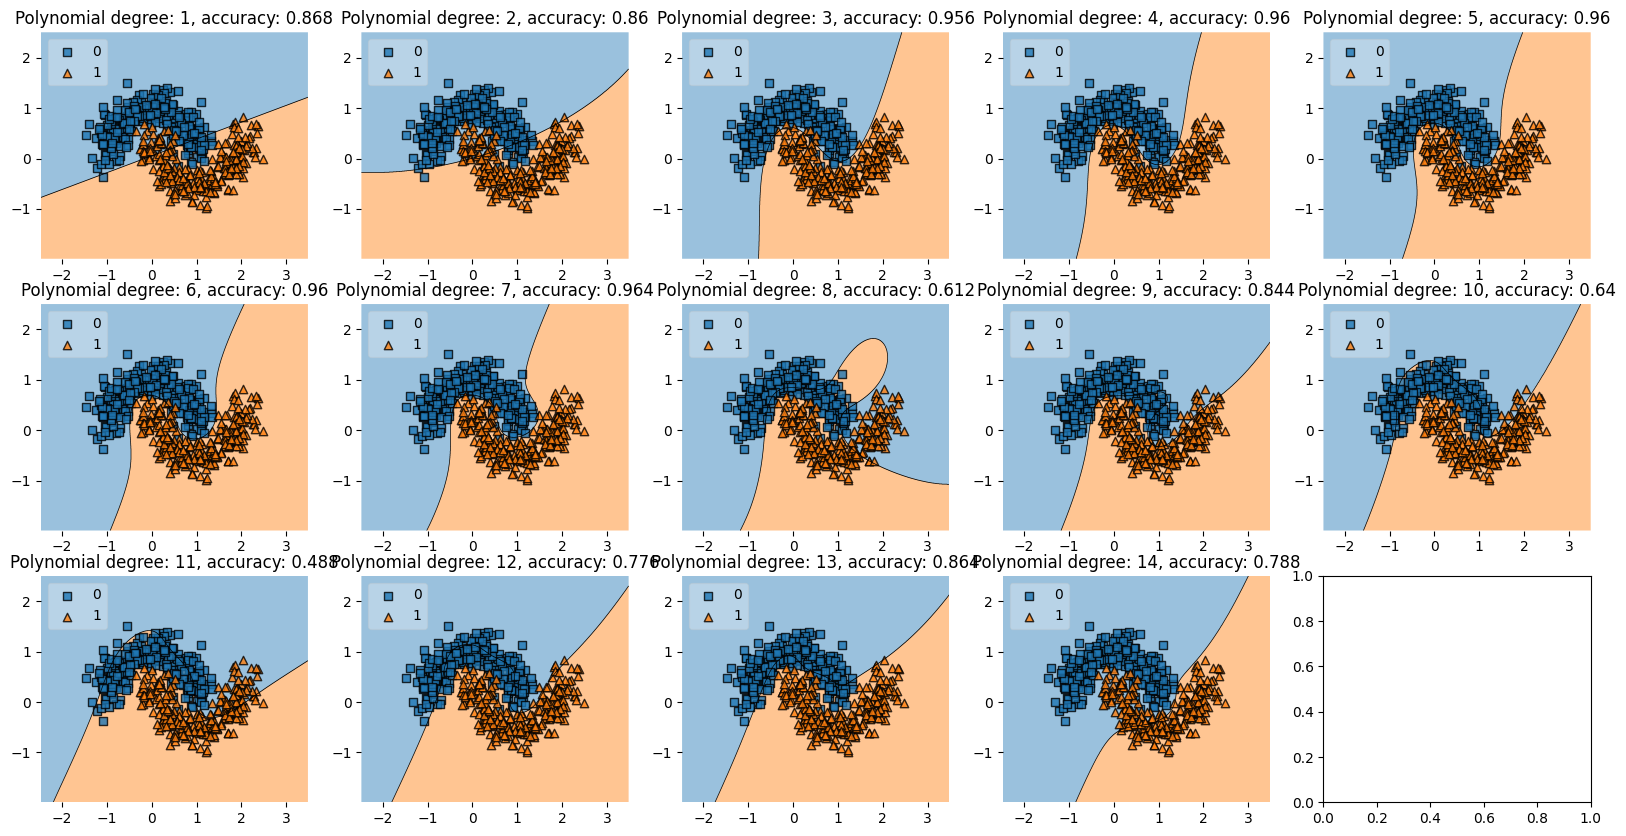

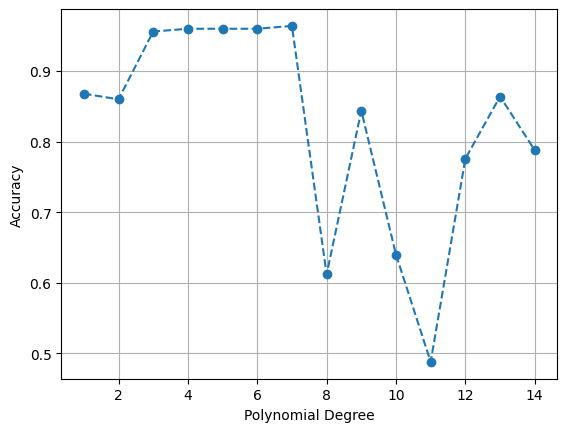

In [83]:
degrees = range(1, 15)
accuracies = []
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))
axes = axes.flatten()
for i in tqdm(range(len(degrees))):
    svm = SVC(kernel="poly", tol=1e-3, max_iter=500, degree=degrees[i], C=1, coef0=2)
    svm.fit(moons_points, moons_labels)
    predicted_labels_svm = svm.predict(test_moons)
    svm_accuracy = accuracy_score(test_labels, predicted_labels_svm)
    plot_decision_regions(moons_points, moons_labels, clf=svm, legend=2, ax=axes[i])
    axes[i].set_title(f"Polynomial degree: {degrees[i]}, accuracy: {svm_accuracy}")
    accuracies.append(svm_accuracy)
plt.show()
plt.plot(degrees, accuracies, marker='o', linestyle='--')
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

#### НЕ-полиномы:

##### RBF

 43%|████▎     | 6/14 [04:16<05:42, 42.81s/it]


IndexError: list index out of range

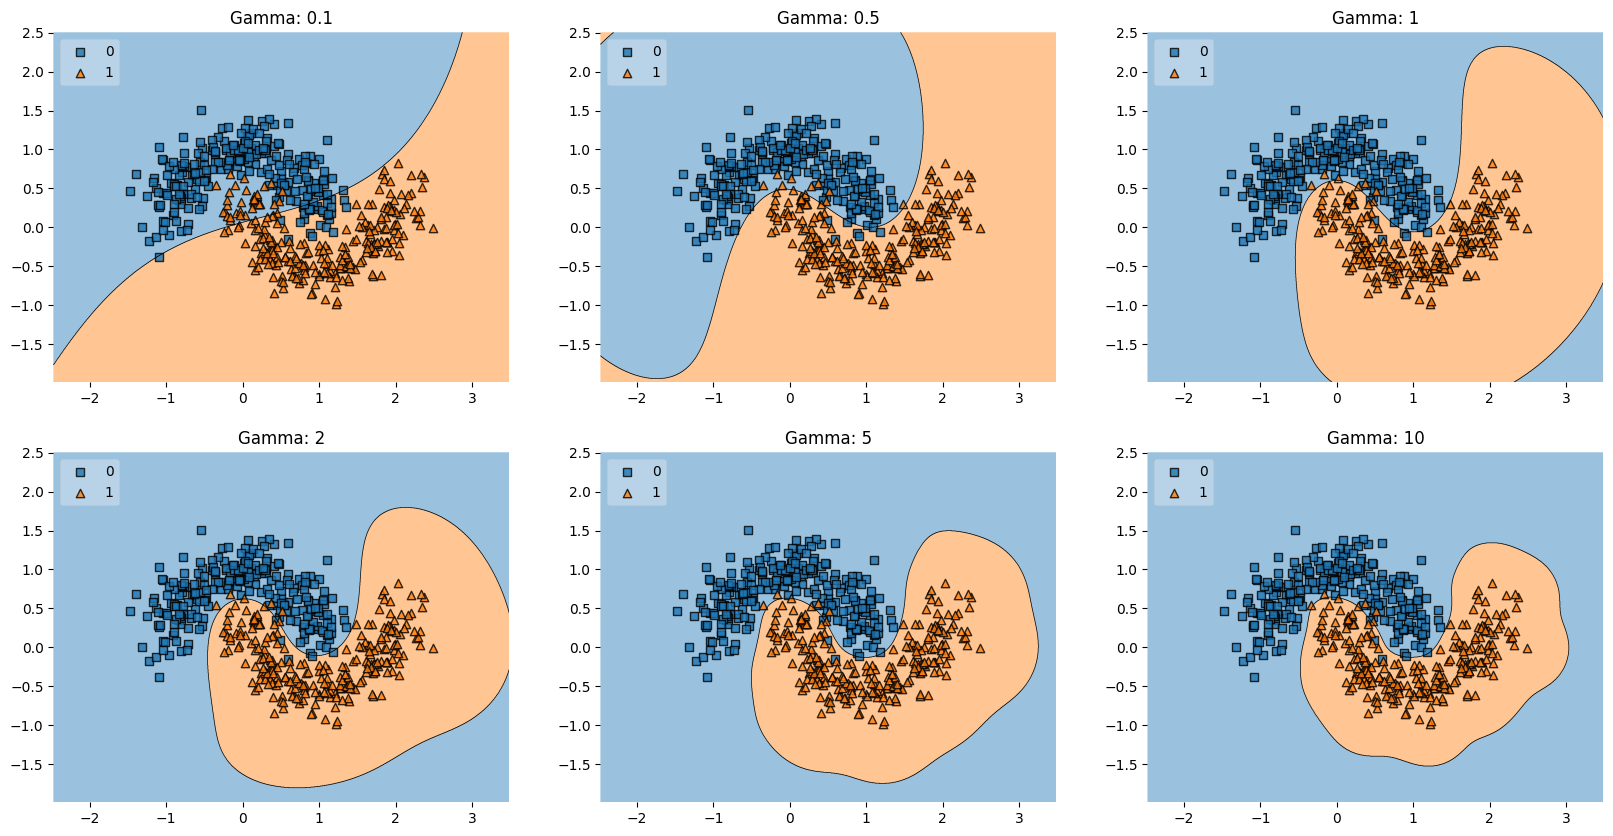

In [54]:
gammas = [0.1, 0.5, 1, 2, 5, 10]
accuracies = []
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axes = axes.flatten()
for i in tqdm(range(len(degrees))):
    svm = SVC(kernel="rbf", tol=1e-3, max_iter=500, gamma=gammas[i], C=1, coef0=2)
    svm.fit(moons_points, moons_labels)
    predicted_labels_svm = svm.predict(test_moons)
    svm_accuracy = accuracy_score(test_labels, predicted_labels_svm)
    plot_decision_regions(moons_points, moons_labels, clf=svm, legend=2, ax=axes[i])
    axes[i].set_title(f"Gamma: {gammas[i]}")
    accuracies.append(svm_accuracy)
plt.show()
plt.plot(gammas, accuracies, marker='o', linestyle='--')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

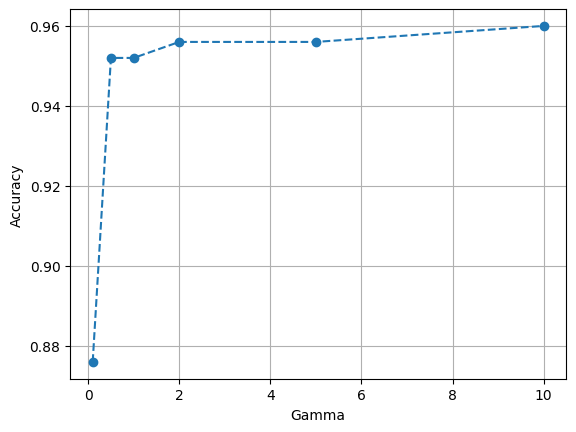

In [55]:
plt.show()
plt.plot(gammas, accuracies, marker='o', linestyle='--')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

##### Кажется, что rbf хорошо подходит для изолироваанных классов. Итераций для обучения требуется не очень много.

#### Sigmoid:

100%|██████████| 6/6 [03:14<00:00, 32.36s/it]


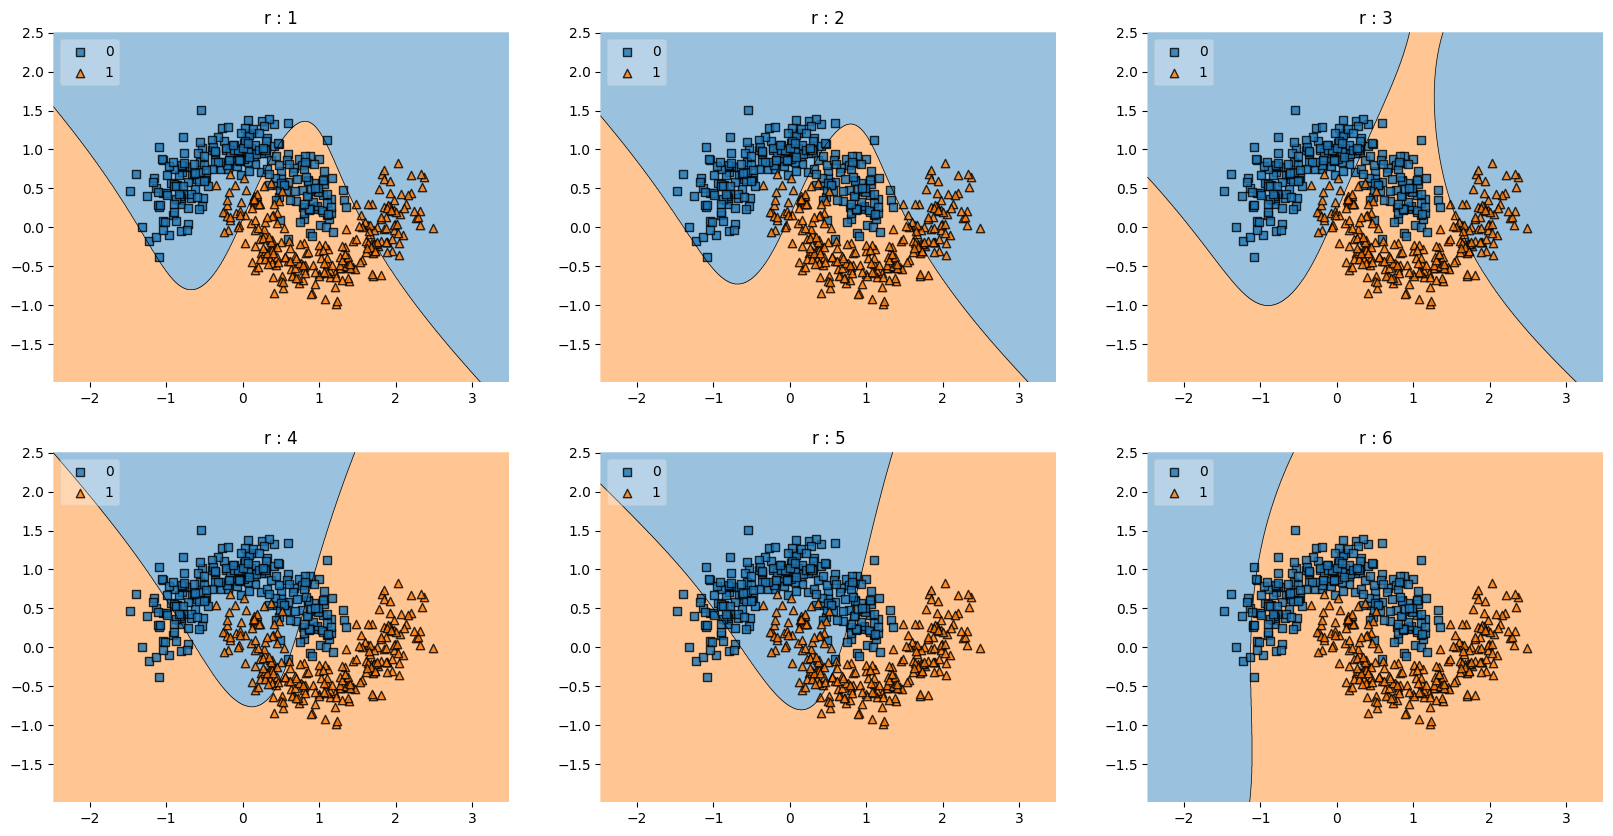

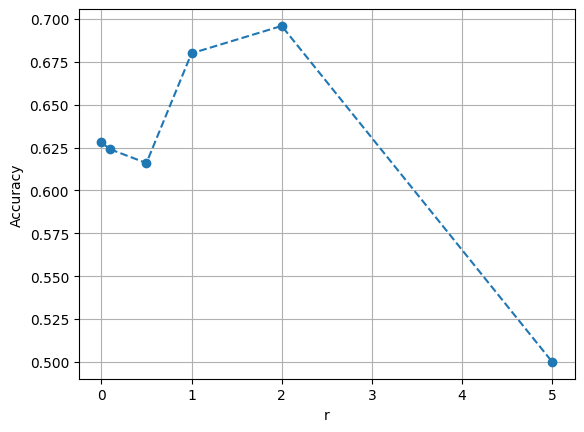

In [56]:
coeffs0 = [0, 0.1, 0.5, 1, 2, 5]
accuracies = []
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axes = axes.flatten()
for i in tqdm(range(len(coeffs0))):
    svm = SVC(kernel="sigmoid", tol=1e-3, max_iter=500, C=1, coef0=coeffs0[i])
    svm.fit(moons_points, moons_labels)
    predicted_labels_svm = svm.predict(test_moons)
    svm_accuracy = accuracy_score(test_labels, predicted_labels_svm)
    plot_decision_regions(moons_points, moons_labels, clf=svm, legend=2, ax=axes[i])
    axes[i].set_title(f"r : {coeffs0[i]}")
    accuracies.append(svm_accuracy)
plt.show()
plt.plot(coeffs0, accuracies, marker='o', linestyle='--')
plt.xlabel('r')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

##### Здесь уже совсем что-то не то...

##### В итоге, самыми достойными для этой задачи мне показались полиномы небольшой степени (d=3) со сдвигом (r=1) и rbf (gamma=10)

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [80]:
pipe = Pipeline([("poly", PolynomialFeatures(3)), ("lr", LogisticRegression(C=1, solver="saga", max_iter=500, tol=1e-3))])

In [81]:
predicted_labels_lr = pipe.fit(moons_points, moons_labels).predict(test_moons)
lr_accuracy = accuracy_score(test_labels, predicted_labels_lr)
print("Accuracy of Logistic Regression with Polynomial Preprocessing: ", lr_accuracy)

Accuracy of Logistic Regression with Polynomial Preprocessing:  0.948


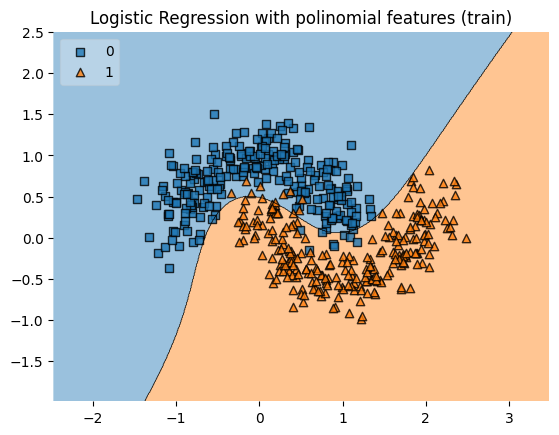

In [82]:
# Plotting decision regions for LR
plot_decision_regions(moons_points, moons_labels, clf=pipe, legend=2)

# Adding axes annotations
plt.title('Logistic Regression with polinomial features (train)')

plt.show()

##### Нет, конечно, это очень похоже на SVM с той же степенью полинома, но всё же, метрики получились немного разными с одним и тем же количеством итераций. 

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

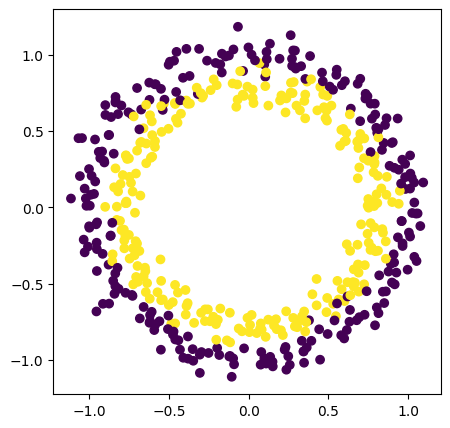

In [86]:
from sklearn.datasets import make_circles


circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

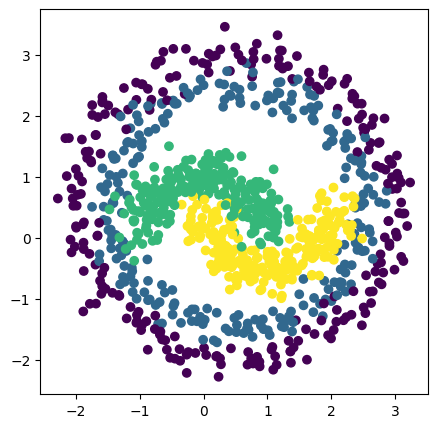

In [87]:
points = np.vstack((circles_points * 2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2))  # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

##### Честно говоря, мне симпатичнее идея генерации фичей, потому что не нужно фиксировать довольно странные гиперпараметры ядра (gamma и r), которые сильно влияют на результат. Степень полинома -- гораздо более интуитивный параметр.

##### Выполняя эту часть, я вдруг выяснил, что SAGA был не лучшим солвером для данного типа задач. Дело в том, что здесь классы действительно хорошо отделяются друг от друга гладкими функциями и фичей не очень много, как и точек. Я поэкспериментировал, и добился лучших результатов с дефолтным солвером. При использовании lbfgs accuracy бы не ухудшается при повышении степени полинома на подходе с генерацией фичей (на тренировочной выборке), что более ожидаемо и адекватно задаче. SAGA, видимо, проскальзывает настоящий минимум по каким-то причинам.

In [178]:
circles_points_test, circles_labels_test = make_circles(n_samples=250, noise=0.06, random_state=41)

test_points = np.vstack((circles_points_test * 2.5 + 0.5, test_moons))
test_labels = np.hstack((circles_labels_test, test_labels + 2))  # + 2 to distinct moons classes

In [179]:
### YOUR CODE HERE

pipe = Pipeline([("poly", PolynomialFeatures(6, include_bias=True)), 
                 ("lr", LogisticRegression(C=1, max_iter=6000, tol=1e-3))])

In [180]:
predicted_labels_lr = pipe.fit(points, labels).predict(test_points)
lr_accuracy = accuracy_score(test_labels, predicted_labels_lr)
print("Accuracy of Logistic Regression with Polynomial Preprocessing: ", lr_accuracy)

Accuracy of Logistic Regression with Polynomial Preprocessing:  0.944


C:\Users\serge\Desktop\ML_course\.venv\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


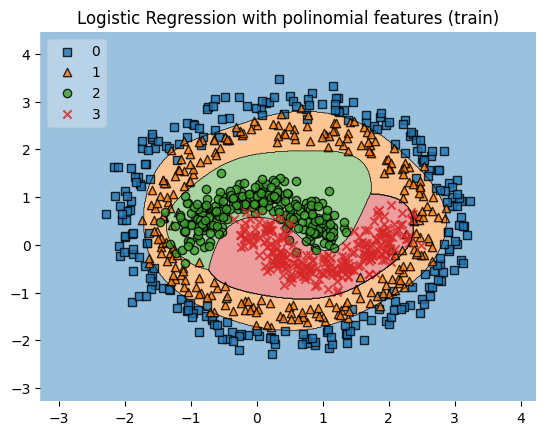

In [181]:
# Plotting decision regions for LR
plot_decision_regions(points, labels, clf=pipe, legend=2)

# Adding axes annotations
plt.title('Logistic Regression with polinomial features (train)')

plt.show()

C:\Users\serge\Desktop\ML_course\.venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=6000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy of SVM with Polynomial kernel:  0.938


C:\Users\serge\Desktop\ML_course\.venv\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


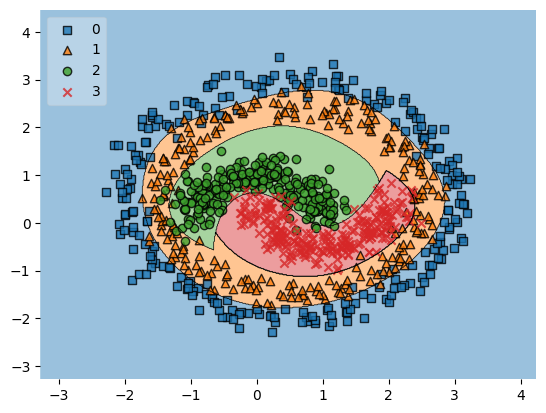

In [185]:
svm = SVC(kernel="poly", tol=1e-3, max_iter=6000, degree=6, C=1, coef0=1)
svm.fit(points, labels)
predicted_labels_svm = svm.predict(test_points)
svm_accuracy = accuracy_score(test_labels, predicted_labels_svm)
plot_decision_regions(points, labels, clf=svm, legend=2)
print("Accuracy of SVM with Polynomial kernel: ", svm_accuracy)

C:\Users\serge\Desktop\ML_course\.venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=6000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy of SVM with Polynomial kernel:  0.652


C:\Users\serge\Desktop\ML_course\.venv\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


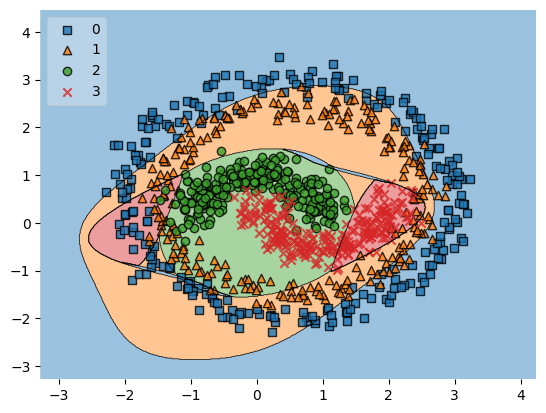

In [186]:
svm = SVC(kernel="poly", tol=1e-3, max_iter=6000, degree=6, C=1, coef0=0)
svm.fit(points, labels)
predicted_labels_svm = svm.predict(test_points)
svm_accuracy = accuracy_score(test_labels, predicted_labels_svm)
plot_decision_regions(points, labels, clf=svm, legend=2)
print("Accuracy of SVM with Polynomial kernel: ", svm_accuracy)

##### Ну вот, на этой задаче наблюдается то же самое, что и ранее: при выборе coeff0=0 (а это поведение по умолчанию!) SVM не может адекватно разделять классы. При coeff0=1 поведение SVM примерно такое же, как и линейной регрессии с добавленными полиномиальными фичами.